<a href="https://colab.research.google.com/github/MinhThuan1608/ML_2023/blob/main/Lab_7_20130426_NguyenMinhThuan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab deals with **cross validation** for some classification algorithms and **clustering methods**. 

*   **Deadline: 23:59, 10/4/2023**



# Import libraries

In [1]:
# code
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from prettytable import PrettyTable
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ml'
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.cluster import KMeans
from scipy.stats import mode
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/ml


#Task 1. With **iris** dataset
*  1.1. Apply **SVM** algorithm with cross validation


In [2]:
#code
data = datasets.load_iris()
X = data.data
y = data.target
clf = svm.SVC(kernel="sigmoid", random_state=0)
scores = cross_validate(clf, X, y, scoring='accuracy', cv=10)
print(sorted(scores.keys()))
print(np.mean(scores['test_score']))

['fit_time', 'score_time', 'test_score']
0.06666666666666668


*  1.2 Apply **feature selection** to the dataset and then use **RandomForest** algorithm with cross validation 

In [3]:
#code
X = SelectKBest(chi2, k=4).fit_transform(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

clf = RandomForestClassifier(n_estimators=100)
scores = cross_validate(clf, X_train, y_train, scoring='accuracy', cv=10)
print(sorted(scores.keys()))
print(np.mean(scores['test_score']))

['fit_time', 'score_time', 'test_score']
0.9333333333333332


#Task 2. With mnist dataset: 
*   2.1. Apply **K-Means** algorithm using k=10, 

In [4]:
# code
dataset = datasets.load_digits()

kmeans = KMeans(n_clusters = 10, n_init=10, random_state = 0)
kmeans.fit(dataset.data)
clusters = kmeans.predict(dataset.data)

print(kmeans.cluster_centers_.shape)

labels = np.zeros_like(clusters)
for i in range(3):
  mask = (clusters == i)
  labels[mask] = mode(dataset.target[mask])[0]
acc1 = metrics.accuracy_score(dataset.target, labels)
pre1 = metrics.precision_score(dataset.target, labels, average='macro')
rec1 = metrics.recall_score(dataset.target, labels, average='macro')
f11 = metrics.f1_score(dataset.target, labels, average='macro')
print(acc1)

(10, 64)
0.35058430717863104


<ipython-input-4-7f8617585de3>:13: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(dataset.target[mask])[0]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


*   2.2. Compare the obtained result with with other classification algorithms such as **Randomforest**, **kNN**, and **Naïve Bayes** in terms of accuracy, precision, recall, f1 using cross validation. 


In [5]:
# code
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size = 0.1, shuffle=True, random_state = 1)

clf = RandomForestClassifier(n_estimators=100)
acc2 = cross_validate(clf, X_train, y_train, scoring='accuracy', cv=10)
pre2 = cross_validate(clf, X_train, y_train, scoring='precision_macro', cv=10)
rec2 = cross_validate(clf, X_train, y_train, scoring='recall_macro', cv=10)
f12 = cross_validate(clf, X_train, y_train, scoring='f1_macro', cv=10)

clf = KNeighborsClassifier(n_neighbors=3)
acc3 = cross_validate(clf, X_train, y_train, scoring='accuracy', cv=10)
pre3 = cross_validate(clf, X_train, y_train, scoring='precision_macro', cv=10)
rec3 = cross_validate(clf, X_train, y_train, scoring='recall_macro', cv=10)
f13 = cross_validate(clf, X_train, y_train, scoring='f1_macro', cv=10)

clf = GaussianNB()
acc4 = cross_validate(clf, X_train, y_train, scoring='accuracy', cv=10)
pre4 = cross_validate(clf, X_train, y_train, scoring='precision_macro', cv=10)
rec4 = cross_validate(clf, X_train, y_train, scoring='recall_macro', cv=10)
f14 = cross_validate(clf, X_train, y_train, scoring='f1_macro', cv=10)

accs = ['kmeans',acc1, np.mean(acc2['test_score']), np.mean(acc3['test_score']), np.mean(acc4['test_score'])]
pres = ['RandomForest',pre1, np.mean(pre2['test_score']), np.mean(pre3['test_score']), np.mean(pre4['test_score'])]
recs = ['kNN',rec1, np.mean(rec2['test_score']), np.mean(rec3['test_score']), np.mean(rec4['test_score'])]
f1s = ['NaiveBayes',f11, np.mean(f12['test_score']), np.mean(f13['test_score']), np.mean(f14['test_score'])]

t = PrettyTable(['algorithsm','accuracy','precision','recall','f1'])
t.add_row(accs)
t.add_row(pres)
t.add_row(recs)
t.add_row(f1s)

print(t)


+--------------+---------------------+--------------------+--------------------+--------------------+
|  algorithsm  |       accuracy      |     precision      |       recall       |         f1         |
+--------------+---------------------+--------------------+--------------------+--------------------+
|    kmeans    | 0.35058430717863104 | 0.9709263093321064 | 0.9857871328885821 | 0.8540487692661605 |
| RandomForest | 0.29052077194767334 | 0.9756937833837988 | 0.9869674492604059 | 0.8768790624337299 |
|     kNN      | 0.34837173105573116 | 0.9736299019607844 | 0.985950980392157  | 0.8544191176470587 |
|  NaiveBayes  |  0.2857716726929039 | 0.9765557778816794 | 0.9859810761379417 | 0.854355314899748  |
+--------------+---------------------+--------------------+--------------------+--------------------+


*   2.3. From the obtained results, **which approach is better** for this problem: Supervised learning or Unsupervised learning?

In [6]:
#code
print('kmeans')

kmeans


2.4. Apply **AgglomerativeClustering** algorithm to mnist dataset using the number of clusters is 10

In [7]:
#code
cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
cluster.fit_predict(dataset.data)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([7, 9, 4, ..., 4, 1, 4])

#Task 3. 
For given dataset (shopping-data.csv) including 5 attributes: **CustomerID**, **Genre**, **Age**, **Annual Income**, and **Spending Score**.
*   3.1. Using the **scipy library** to create the dendrograms for the given dataset (remember drop categorical attributes: **CustomerID**, **Genre**)





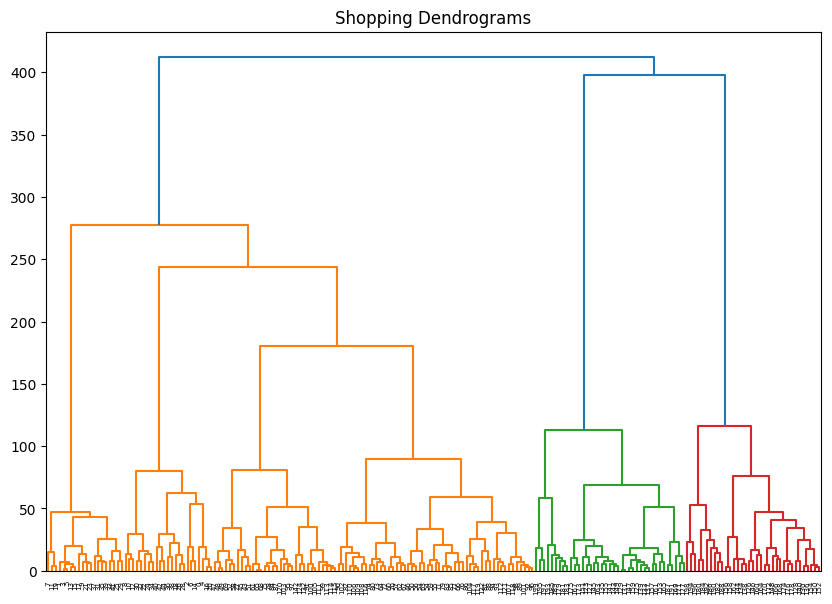

In [8]:
#code
data = pd.read_csv("shopping-data.csv")
plt.figure(figsize=(10, 7))
plt.title("Shopping Dendrograms")
dend = shc.dendrogram(shc.linkage(data.iloc[:, 2:5], method='ward'))

*   3.2. Apply K-Means to the preprocessed dataset with k belongs to [2,10]. Then compute SSE values and plot them to find the best value of k.

In [11]:
#code
sse = []
ks = (2,11)
for k in range(2,11):
  kmeans = KMeans(n_clusters = i, n_init=10, random_state = 0)
  kmeans.fit(data.iloc[:, 2:5])
  sse.append(kmeans.inertia_)
print(sse)



[212840.1698209719, 212840.1698209719, 212840.1698209719, 212840.1698209719, 212840.1698209719, 212840.1698209719, 212840.1698209719, 212840.1698209719, 212840.1698209719]


*   3.2. From the obtained dengrograms, choose an appropriate number of clusters and apply **AgglomerativeClustering** algorithm to the given dataset

In [ ]:
#code

#Finally,
Save a copy in your Github. Remember renaming the notebook.